In [1]:
import pandas as pd

frauddf = pd.read_csv('../data/raw/consumer_fraud_probability.csv')
consumerdf = pd.read_csv('../data/raw/tbl_consumer.csv', delimiter='|')

In [2]:
print(frauddf.isnull().sum())
print(consumerdf.isnull().sum())

user_id              0
order_datetime       0
fraud_probability    0
dtype: int64
name           0
address        0
state          0
postcode       0
gender         0
consumer_id    0
dtype: int64


In [3]:
frauddf

,user_id,order_datetime,fraud_probability
0,6228,2021-12-19,97.629808
1,21419,2021-12-10,99.247380
2,5606,2021-10-17,84.058250
3,3101,2021-04-17,91.421921
4,22239,2021-10-19,94.703425
...,...,...,...
34859,18466,2022-02-22,8.679873
34860,17552,2021-12-26,8.349463
34861,17875,2021-06-27,8.288847
34862,10401,2021-09-18,8.842216


In [4]:
consumerdf

,name,address,state,postcode,gender,consumer_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975
...,...,...,...,...,...,...
499994,Jessica Avila,508 Miranda Overpass Apt. 218,QLD,4400,Female,1385608
499995,Steven Thornton,7913 Schwartz Mission Suite 483,VIC,3097,Undisclosed,1466964
499996,Christy Smith,5681 Zachary Mountain Apt. 060,NSW,2756,Undisclosed,1253484
499997,Donna Sutton,54140 Jacob Point,VIC,3989,Female,175005


In [5]:
import pandas as pd

userdf = pd.read_parquet('../data/raw/consumer_user_details.parquet')
userdf

,user_id,consumer_id
0,1,1195503
1,2,179208
2,3,1194530
3,4,154128
4,5,712975
...,...,...
499994,499995,1385608
499995,499996,1466964
499996,499997,1253484
499997,499998,175005


In [6]:
mergeddf1 = consumerdf.merge(userdf, on='consumer_id', how='left')
mergeddf1

,name,address,state,postcode,gender,consumer_id,user_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,2
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,3
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,4
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975,5
...,...,...,...,...,...,...,...
499994,Jessica Avila,508 Miranda Overpass Apt. 218,QLD,4400,Female,1385608,499995
499995,Steven Thornton,7913 Schwartz Mission Suite 483,VIC,3097,Undisclosed,1466964,499996
499996,Christy Smith,5681 Zachary Mountain Apt. 060,NSW,2756,Undisclosed,1253484,499997
499997,Donna Sutton,54140 Jacob Point,VIC,3989,Female,175005,499998


In [7]:
"""mdf = mergeddf1.merge(frauddf, on='user_id', how='left')
mdf
"""

"mdf = mergeddf1.merge(frauddf, on='user_id', how='left')\nmdf\n"

In [8]:
mergeddf2 = frauddf.merge(mergeddf1, on='user_id', how='left')
mergeddf2

,user_id,order_datetime,fraud_probability,name,address,state,postcode,gender,consumer_id
0,6228,2021-12-19,97.629808,Mr. James Norton DDS,558 Chang Land,VIC,3186,Male,1242133
1,21419,2021-12-10,99.247380,Janet Warner,9051 Neal Mission,QLD,4003,Female,10448
2,5606,2021-10-17,84.058250,Mercedes Liu,18523 Bradford Junction,QLD,4454,Undisclosed,882166
3,3101,2021-04-17,91.421921,Christopher Roberson,6757 Reginald Haven,WA,6484,Male,27622
4,22239,2021-10-19,94.703425,George Mendoza,156 Alexander Village,VIC,3813,Male,184299
...,...,...,...,...,...,...,...,...,...
34859,18466,2022-02-22,8.679873,Elizabeth Garcia,650 Howard Gardens Apt. 209,VIC,3161,Female,477279
34860,17552,2021-12-26,8.349463,Sharon Clark,952 Timothy Stravenue,QLD,4715,Female,190052
34861,17875,2021-06-27,8.288847,Ryan Harris,4118 Patricia Fall,QLD,4123,Male,1127546
34862,10401,2021-09-18,8.842216,William Carpenter,638 Monroe Unions,WA,6324,Male,561552


In [9]:
new_df = mergeddf2[['fraud_probability', 'postcode']]
new_df

,fraud_probability,postcode
0,97.629808,3186
1,99.247380,4003
2,84.058250,4454
3,91.421921,6484
4,94.703425,3813
...,...,...
34859,8.679873,3161
34860,8.349463,4715
34861,8.288847,4123
34862,8.842216,6324


In [10]:
POA_fraud_prob = mergeddf2.groupby('postcode')['fraud_probability'].mean()
POA_fraud_prob

postcode
200     13.054126
800     16.760218
801     13.143086
804     11.359722
810     10.852950
          ...    
9013    11.179270
9015    16.969752
9464    11.365251
9726    17.865841
9999    14.807060
Name: fraud_probability, Length: 3161, dtype: float64

In [11]:
POA_fraud_prob.to_csv('../data/curated/POA_fraud_prob.csv')

In [12]:
absdf = pd.read_csv('../data/raw/ABS_data/2021 Census GCP Postal Areas for AUS/2021Census_G02_AUST_POA.csv')
absdf

,POA_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
0,POA2000,32,2800,941,625,2367,1.3,2225,2.1
1,POA2007,30,2500,772,500,2197,1.2,1805,2.1
2,POA2008,28,2600,860,525,2453,1.2,1746,1.9
3,POA2009,37,2800,1297,580,3035,1.1,2422,2.1
4,POA2010,36,2900,1479,550,3709,1.1,2297,1.7
...,...,...,...,...,...,...,...,...,...
2638,POA2899,50,1300,736,240,1630,0.8,1184,2.1
2639,POA6798,38,1300,1233,150,2659,1.0,2109,2.5
2640,POA6799,40,1972,741,231,1678,1.1,2519,3.8
2641,POA9494,0,0,0,0,0,0.0,0,0.0


In [13]:
absdf['POA_CODE_2021'] = absdf['POA_CODE_2021'].str.replace('POA', '').astype(int)

In [14]:
absdf_cut = absdf.loc[:, ["POA_CODE_2021", "Median_tot_prsnl_inc_weekly"]]
absdf_cut

,POA_CODE_2021,Median_tot_prsnl_inc_weekly
0,2000,941
1,2007,772
2,2008,860
3,2009,1297
4,2010,1479
...,...,...
2638,2899,736
2639,6798,1233
2640,6799,741
2641,9494,0


In [15]:
smoldf = absdf.merge(POA_fraud_prob, left_on='POA_CODE_2021', right_on='postcode', how='left')
smoldf

,POA_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,fraud_probability
0,2000,32,2800,941,625,2367,1.3,2225,2.1,12.798082
1,2007,30,2500,772,500,2197,1.2,1805,2.1,15.912898
2,2008,28,2600,860,525,2453,1.2,1746,1.9,11.882691
3,2009,37,2800,1297,580,3035,1.1,2422,2.1,10.547971
4,2010,36,2900,1479,550,3709,1.1,2297,1.7,14.903246
...,...,...,...,...,...,...,...,...,...,...
2638,2899,50,1300,736,240,1630,0.8,1184,2.1,12.914080
2639,6798,38,1300,1233,150,2659,1.0,2109,2.5,16.384413
2640,6799,40,1972,741,231,1678,1.1,2519,3.8,14.869691
2641,9494,0,0,0,0,0,0.0,0,0.0,NaN


In [16]:
smoldf['fraud_probability'] = smoldf['fraud_probability'].fillna(smoldf['fraud_probability'].mean())
smoldf

,POA_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,fraud_probability
0,2000,32,2800,941,625,2367,1.3,2225,2.1,12.798082
1,2007,30,2500,772,500,2197,1.2,1805,2.1,15.912898
2,2008,28,2600,860,525,2453,1.2,1746,1.9,11.882691
3,2009,37,2800,1297,580,3035,1.1,2422,2.1,10.547971
4,2010,36,2900,1479,550,3709,1.1,2297,1.7,14.903246
...,...,...,...,...,...,...,...,...,...,...
2638,2899,50,1300,736,240,1630,0.8,1184,2.1,12.914080
2639,6798,38,1300,1233,150,2659,1.0,2109,2.5,16.384413
2640,6799,40,1972,741,231,1678,1.1,2519,3.8,14.869691
2641,9494,0,0,0,0,0,0.0,0,0.0,15.324632


In [17]:
correlation_matrix = smoldf.corr()
correlation_matrix

,POA_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,fraud_probability
POA_CODE_2021,1.000000,0.127996,-0.352487,-0.065945,-0.394129,-0.204617,-0.240773,-0.217484,-0.146677,-0.015695
Median_age_persons,0.127996,1.000000,-0.263880,-0.388628,-0.289038,-0.373118,-0.464630,-0.471672,-0.461737,-0.006008
Median_mortgage_repay_monthly,-0.352487,-0.263880,1.000000,0.402236,0.824212,0.673124,0.309853,0.700812,0.331828,0.002302
Median_tot_prsnl_inc_weekly,-0.065945,-0.388628,0.402236,1.000000,0.372314,0.756735,0.188926,0.740034,0.093795,0.003789
Median_rent_weekly,-0.394129,-0.289038,0.824212,0.372314,1.000000,0.636216,0.305931,0.656202,0.302554,-0.019666
Median_tot_fam_inc_weekly,-0.204617,-0.373118,0.673124,0.756735,0.636216,1.000000,0.272299,0.899465,0.271601,-0.003620
Average_num_psns_per_bedroom,-0.240773,-0.464630,0.309853,0.188926,0.305931,0.272299,1.000000,0.318239,0.403021,-0.011379
Median_tot_hhd_inc_weekly,-0.217484,-0.471672,0.700812,0.740034,0.656202,0.899465,0.318239,1.000000,0.514930,0.000343
Average_household_size,-0.146677,-0.461737,0.331828,0.093795,0.302554,0.271601,0.403021,0.514930,1.000000,-0.011976
fraud_probability,-0.015695,-0.006008,0.002302,0.003789,-0.019666,-0.003620,-0.011379,0.000343,-0.011976,1.000000


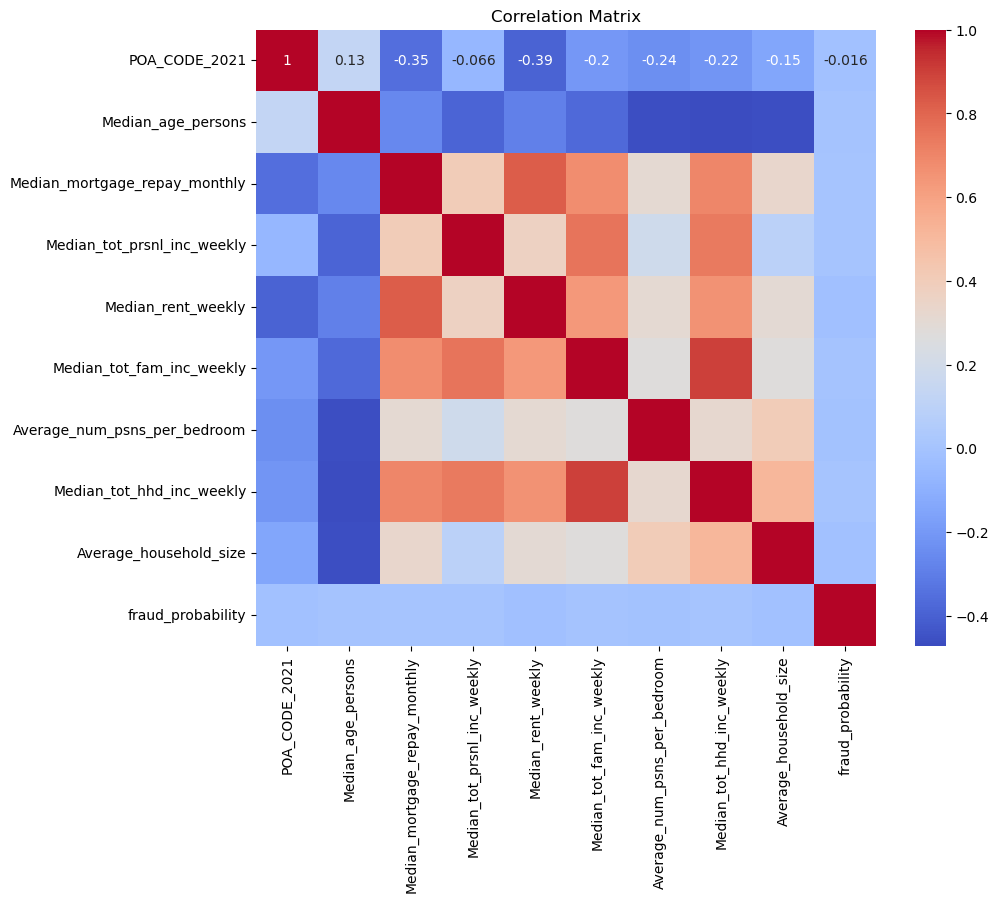

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
import pandas as pd
import geopandas as gpd
import folium

shp = gpd.read_file('../data/raw/ABS_data/POA_2021_AUST_GDA2020.shp')


In [20]:
"""# Create a map centered at a specific location
m = folium.Map(location=[-25.2744, 133.7751], zoom_start=4, attr='wowa')

# Add the GeoDataFrame to the map
folium.GeoJson(shp).add_to(m)"""

"# Create a map centered at a specific location\nm = folium.Map(location=[-25.2744, 133.7751], zoom_start=4, attr='wowa')\n\n# Add the GeoDataFrame to the map\nfolium.GeoJson(shp).add_to(m)"

In [21]:
"""# Create the chloropleth map
folium.Choropleth(
    geo_data=shp,
    name='choropleth',
    data=smoldf,
    columns=['POA_CODE_2021', 'fraud_probability'],
    key_on='feature.properties.POA_CODE21',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Fraud Probabilities by POA',
    highlight=True,
    smooth_factor=0
).add_to(m)

# Display the map
m"""


"# Create the chloropleth map\nfolium.Choropleth(\n    geo_data=shp,\n    name='choropleth',\n    data=smoldf,\n    columns=['POA_CODE_2021', 'fraud_probability'],\n    key_on='feature.properties.POA_CODE21',\n    fill_color='YlGnBu',\n    fill_opacity=0.7,\n    line_opacity=0.3,\n    legend_name='Fraud Probabilities by POA',\n    highlight=True,\n    smooth_factor=0\n).add_to(m)\n\n# Display the map\nm"